In [8]:
%load_ext autoreload
%autoreload 2

from utils import load_input_image, save
import matplotlib.pyplot as plt
from segmentation import Segmentation
from classification import Classification
from features import Features
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


PIECES PROBLEMATIQUES : 
- train : 
    - 2 (en même temps les pièces noirs ça ce classify pas )
    - 8(avec toutes les methodes problématiques, problème avec les arc-en-ciel avec la ligne au milieu)
- train2 : tout ok 

In [3]:
imgs = {i: load_input_image(i,folder="train") for i in range(15)} #modify folder and range

In [5]:
n = 6
img = imgs[n]
seg = Segmentation(img)
seg.find_pieces()

In [ ]:
import cv2
import numpy as np

backgroundModel = np.zeros((1, 65), np.float64)
foregroundModel = np.zeros((1, 65), np.float64)
mask = 3*np.ones((2000,2000), dtype="uint8")
mask[200:250,:100]=2

cv2.grabCut(
    img,  # (255 * self.hsv_img).astype("uint8"),
    mask,
    rect=None,
    bgdModel=backgroundModel,
    fgdModel=foregroundModel,
    iterCount=2,
    mode=cv2.GC_INIT_WITH_MASK,
)

(array([[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]], dtype=uint8),
 array([[ 6.20467678e-04,  4.79049521e-01,  1.56706868e-01,
          3.58257068e-01,  5.36607593e-03,  2.06750000e+02,
          2.00882812e+02,  1.86765625e+02,  1.03972204e+02,
          1.46922976e+02,  5.09863700e+01,  2.39034305e+02,
          2.38355141e+02,  2.27502722e+02,  1.47294153e+02,
          1.82635704e+02,  1.38734842e+02,  2.36946703e+00,
          3.14001807e+00,  2.32829268e+02,  6.78593750e+01,
          6.46035156e+01,  6.66367188e+01,  6.46035156e+01,
          8.97128296e+01,  8.41990967e+01,  6.66367188e+01,
          8.41990967e+01,  1.16241943e+02,  1.24770371e+02,
          1.24375088e+02,  1.21904069e+02,  1.24375088e+02,
          1.35215082e+02,  1.14506124e+02,  1.21904069e+02,
          1.14506124e+02,  1.30585763e+02,  1.99130381

<Figure size 2000x2000 with 0 Axes>

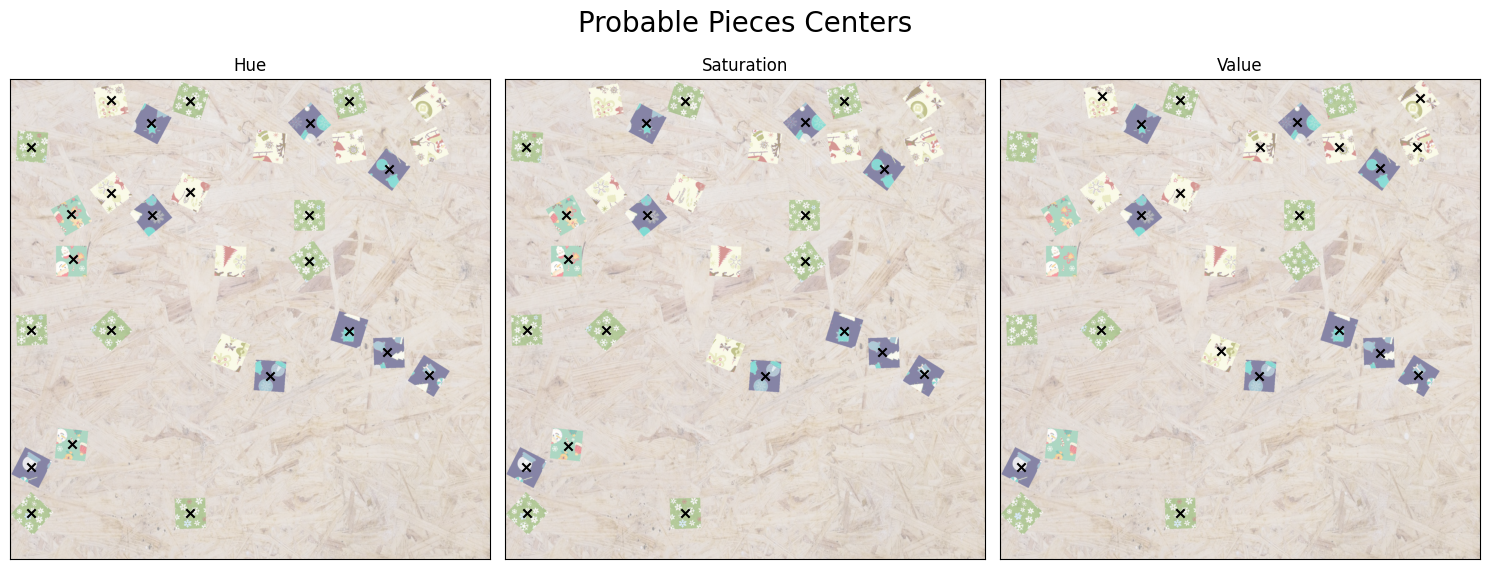

(0.0, 1.0, 0.0, 1.0)

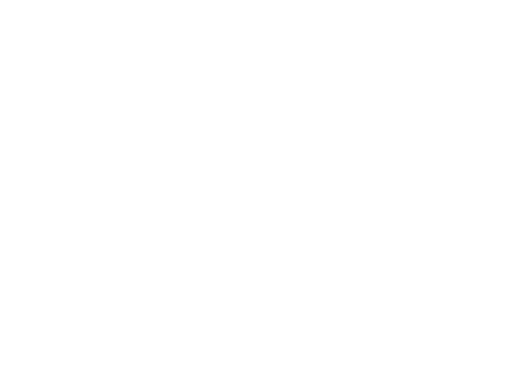

In [12]:
mask_bkg = 2 * np.ones((2000,2000))
mask_frg = np.zeros((2000,2000))
indices = np.indices((2000,2000))

for RoI in seg.RoI_list:
    mask_frg[
        np.sqrt((indices[0] - RoI[0]) ** 2 + (indices[1] - RoI[1]) ** 2) < 80
    ] = 1

mask = (mask_frg + mask_bkg).astype("uint8")
plt.figure(figsize=(20,20))
seg.plot_RoI()
plt.axis("off")

(-0.5, 1999.5, 1999.5, -0.5)

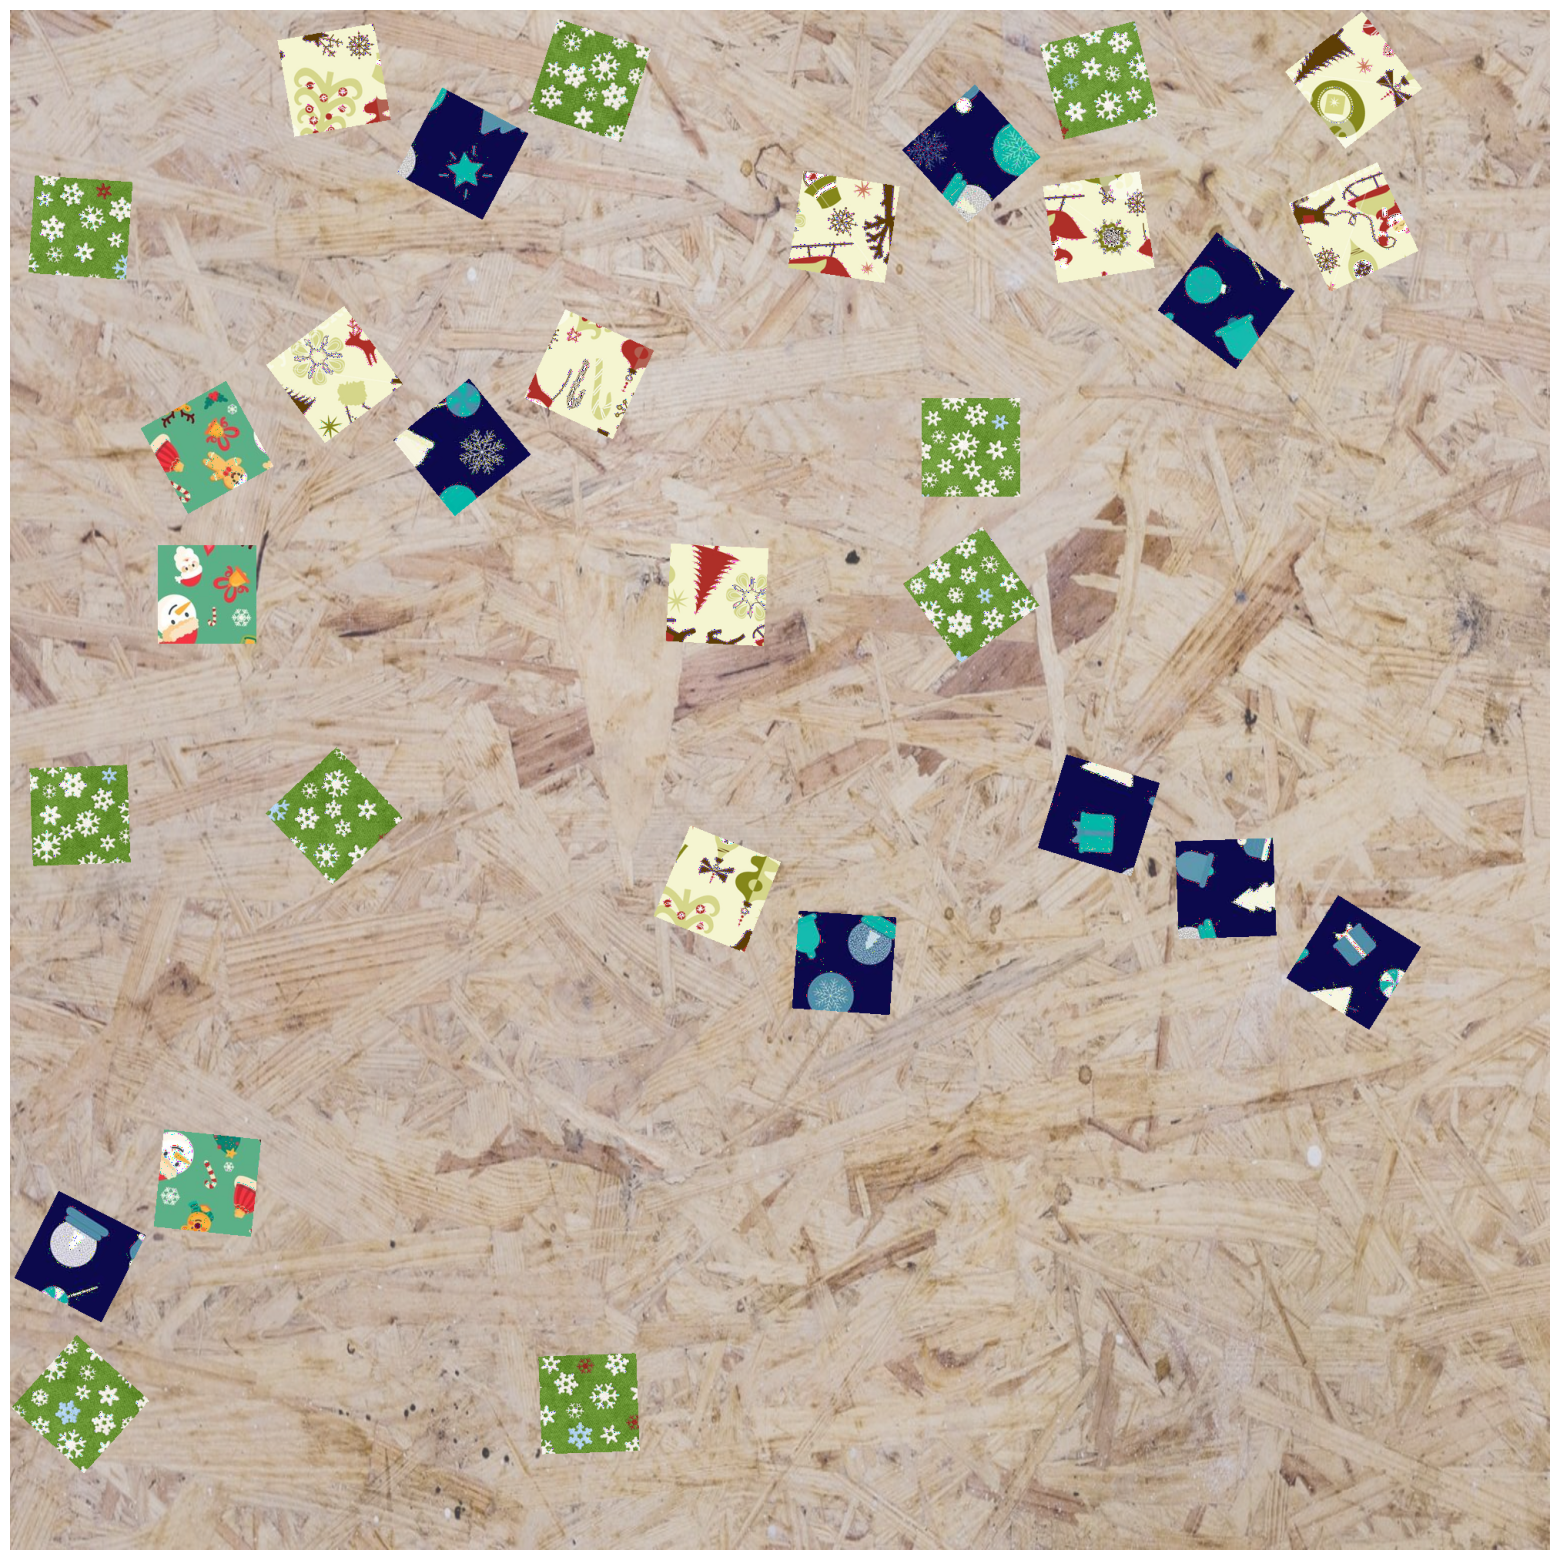

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.axis("off")

(-0.5, 1999.5, 1999.5, -0.5)

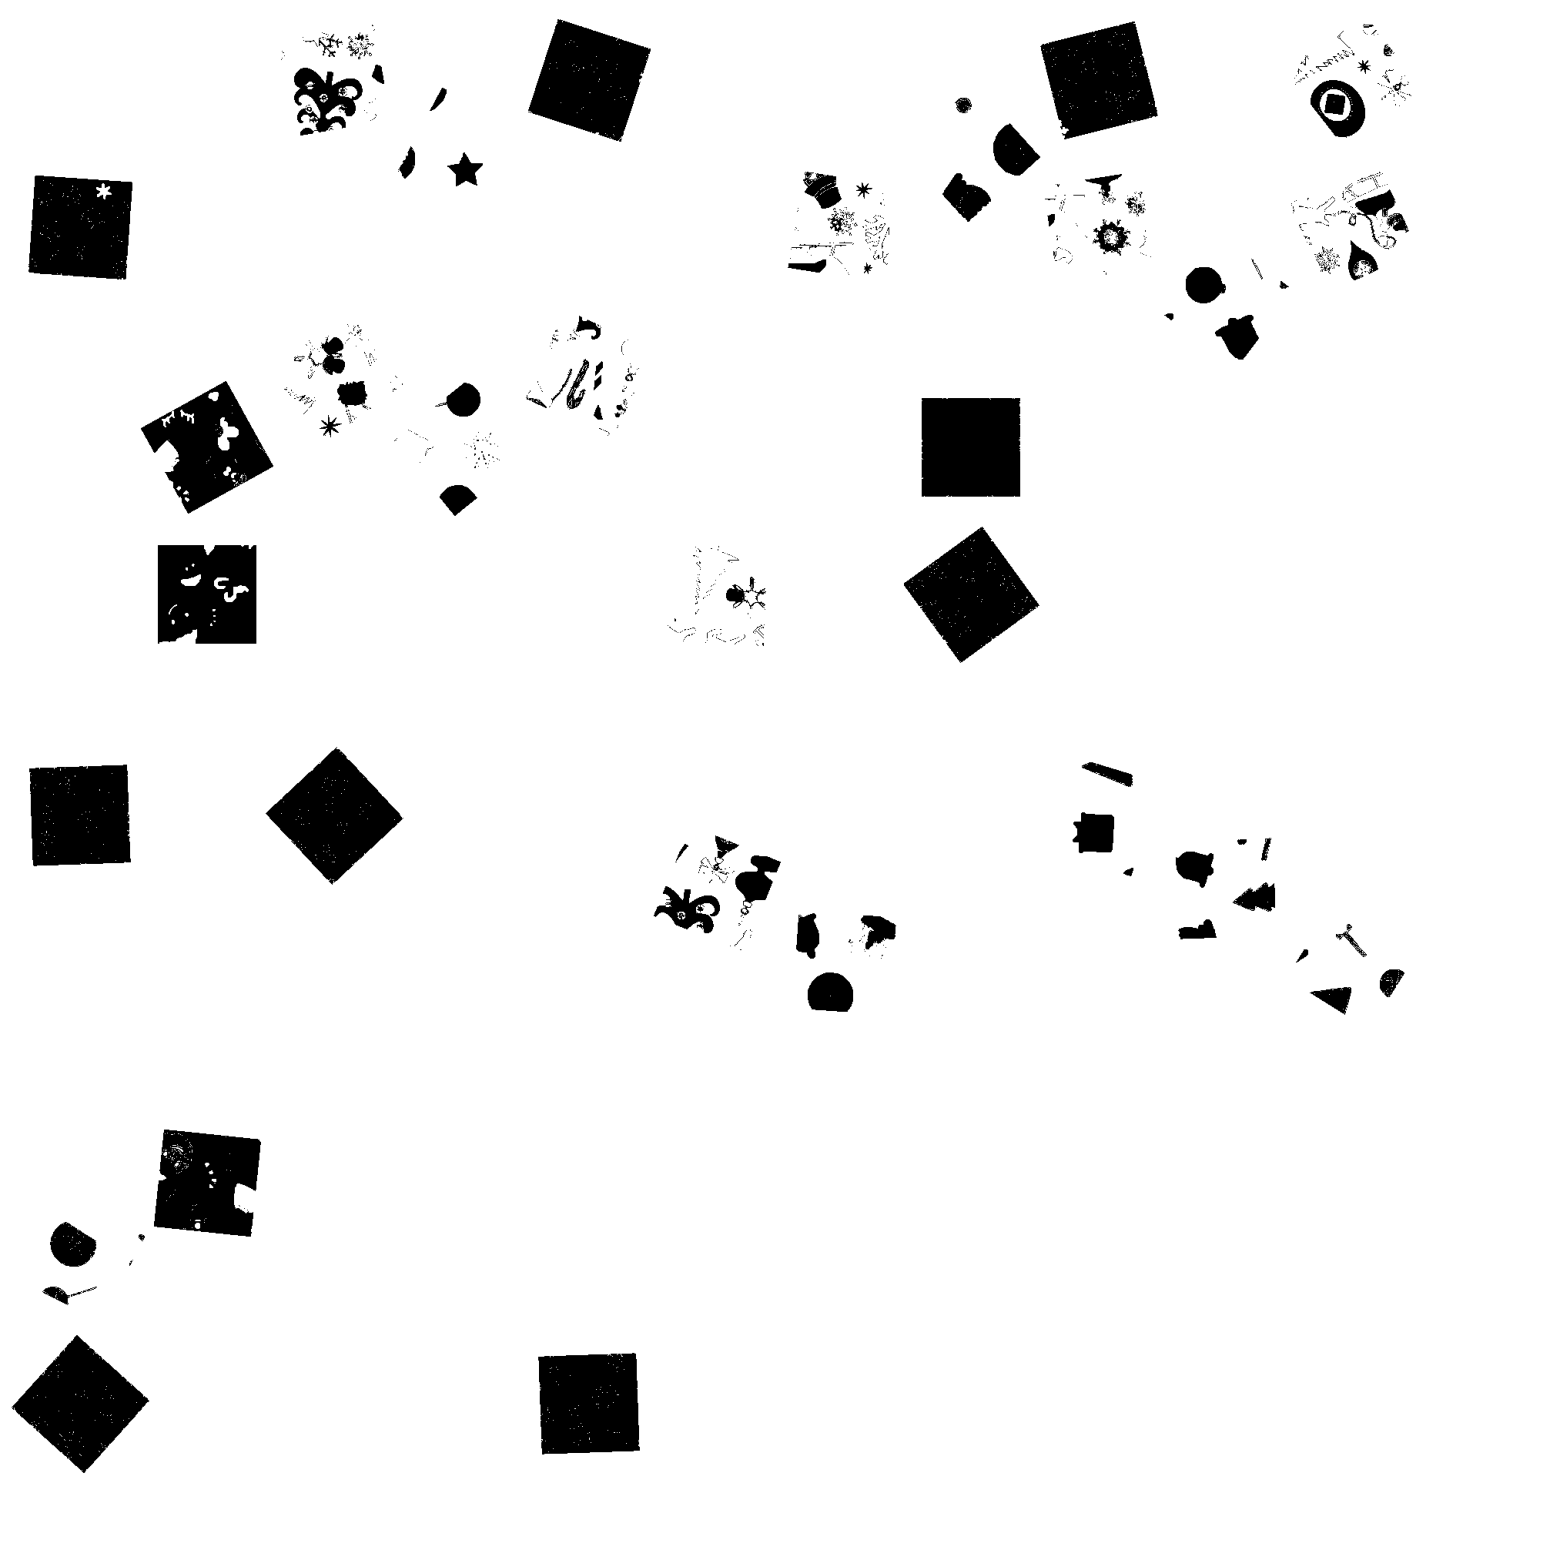

In [40]:
plt.figure(figsize=(20,20))
plt.imshow(mask)
plt.axis("off")

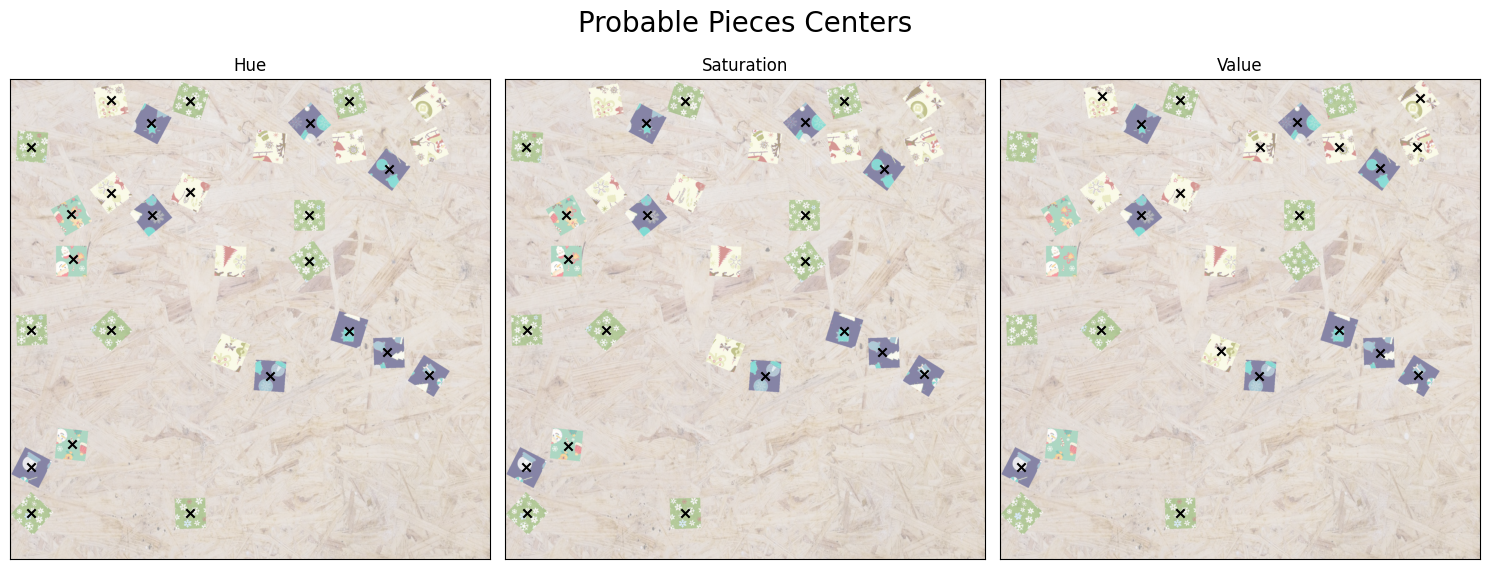

In [20]:
seg.plot_RoI()

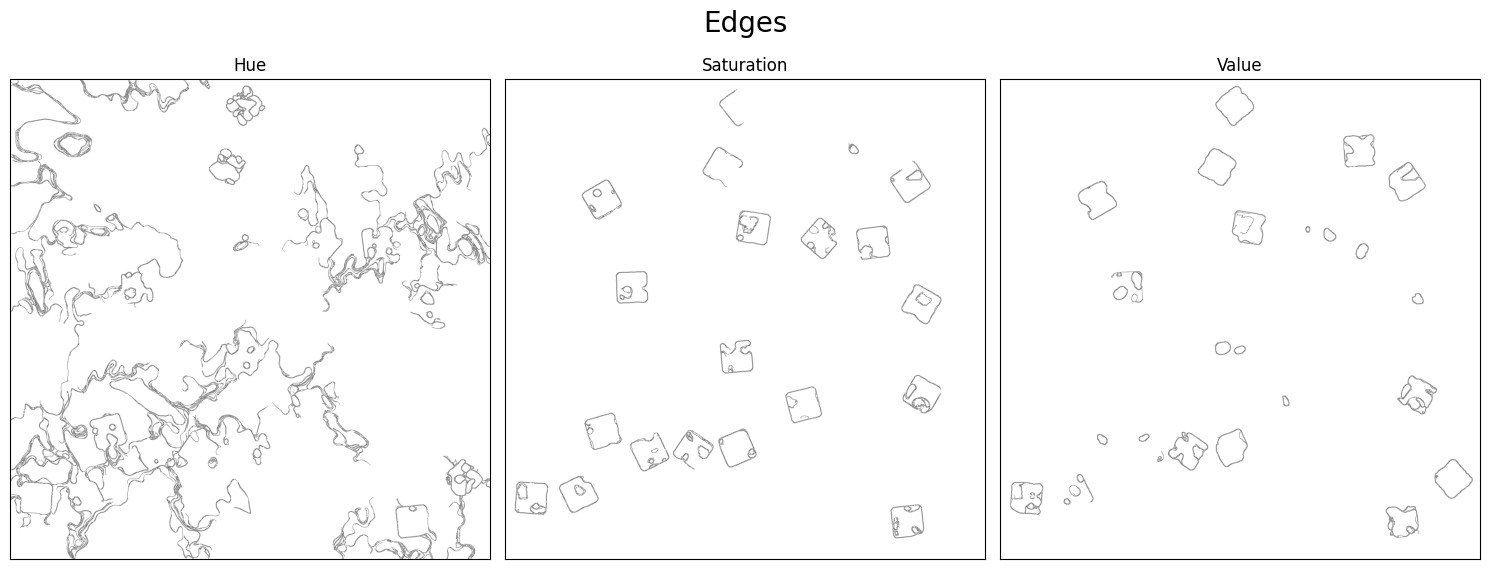

In [8]:
seg.plot_edges()

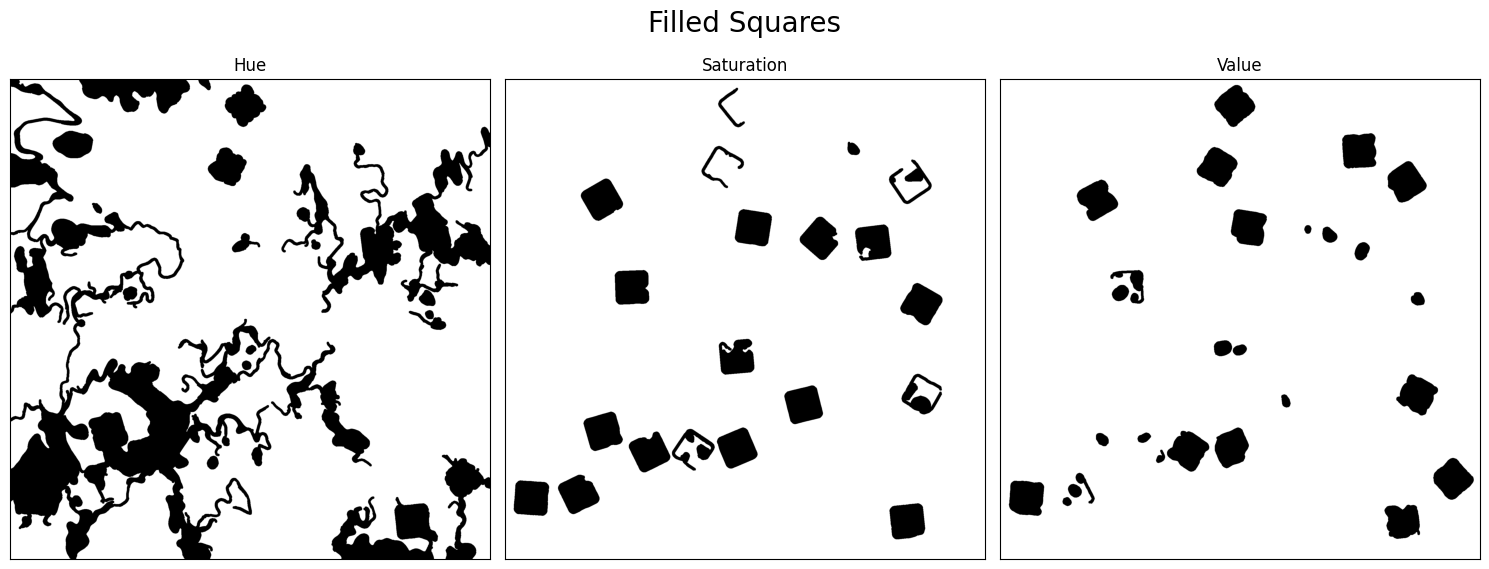

In [10]:
seg.plot_filled_squares()

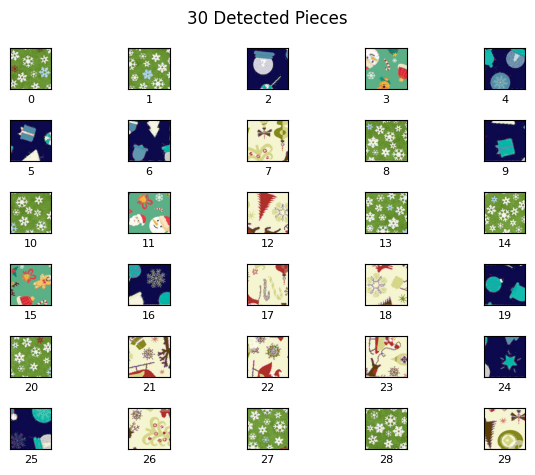

In [15]:
seg.plot_pieces()

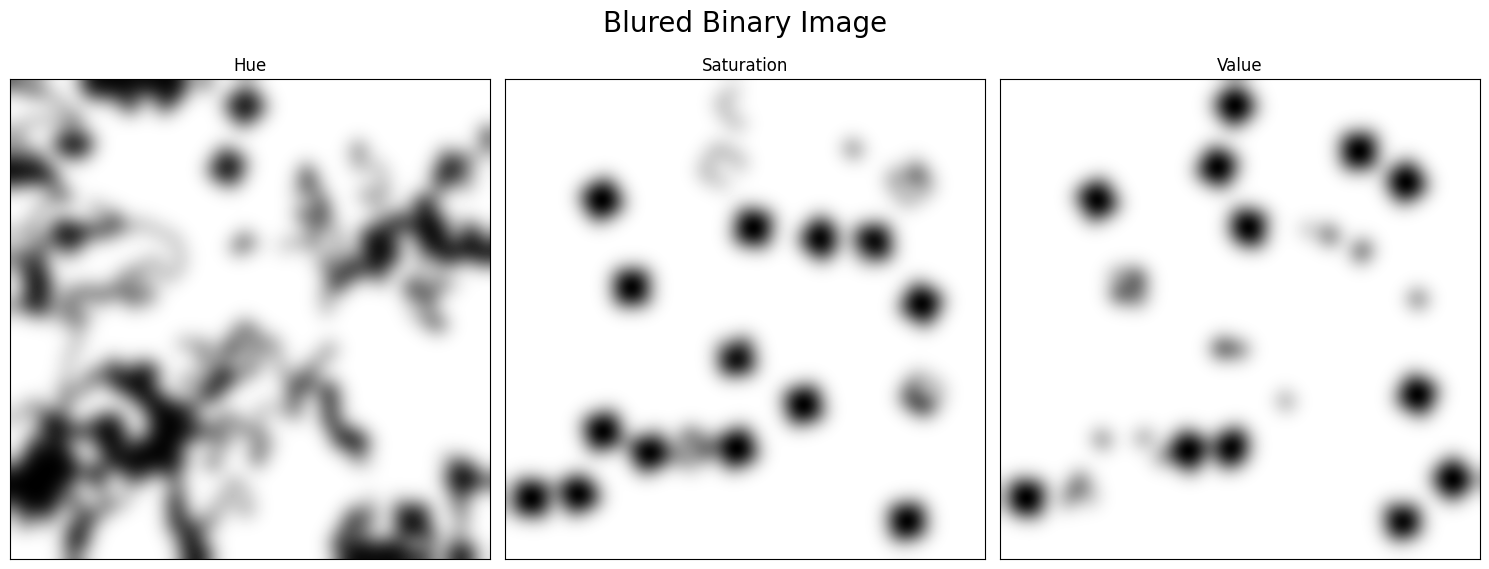

In [11]:
seg.plot_blur()

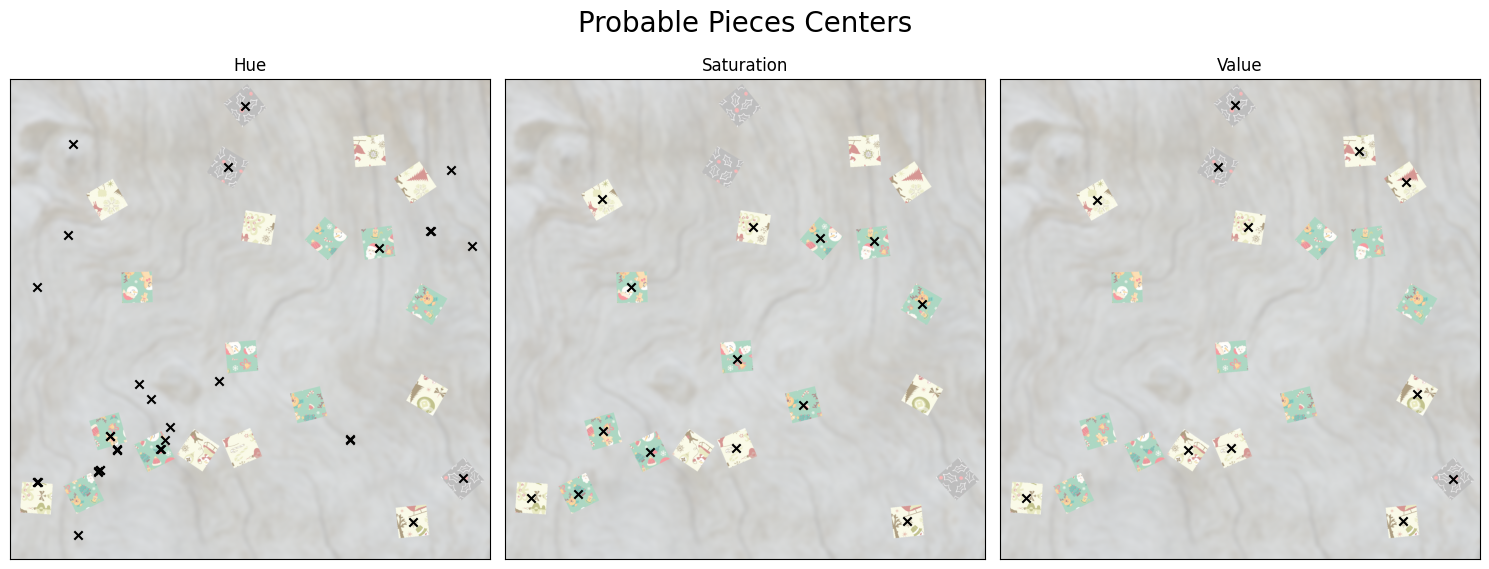

In [9]:
seg.plot_RoI()

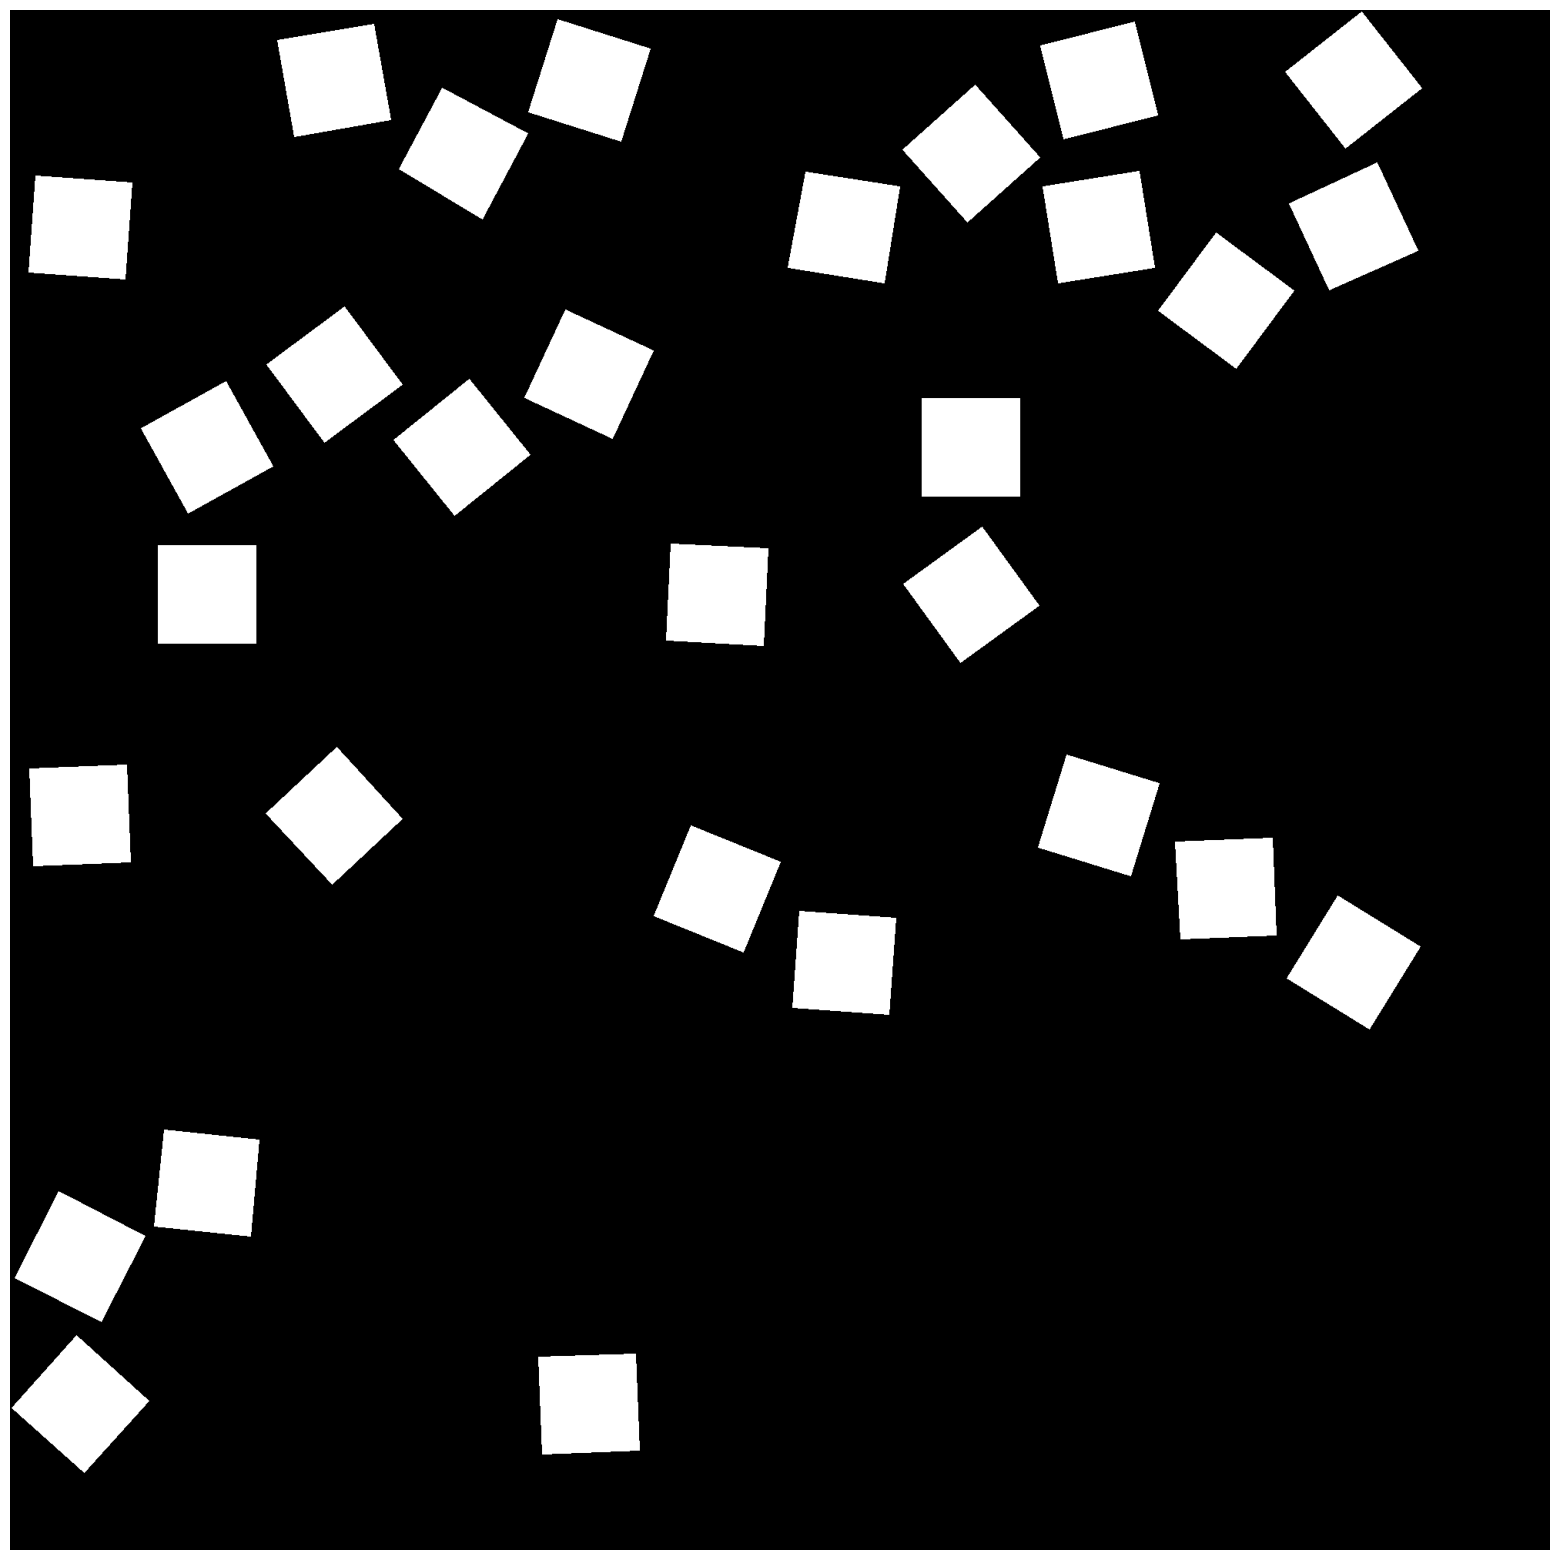

In [14]:

mask_bkg = 2 * np.ones((2000,2000))
mask_frg = np.zeros((2000,2000))
indices = np.indices((2000,2000))

for RoI in seg.RoI_list:
    mask_frg[
        np.sqrt((indices[0] - RoI[0]) ** 2 + (indices[1] - RoI[1]) ** 2) < 80
    ] = 1

mask = (mask_frg + mask_bkg).astype("uint8")
plt.figure(figsize=(20,20))
plt.imshow(seg.mask)
plt.axis("off")
plt.show()
#seg.plot_mask()

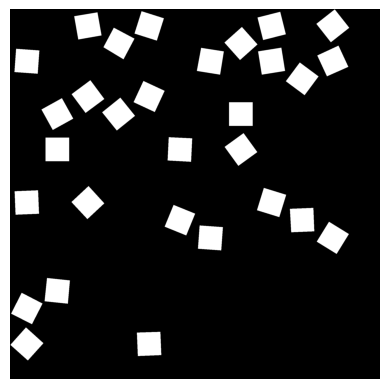

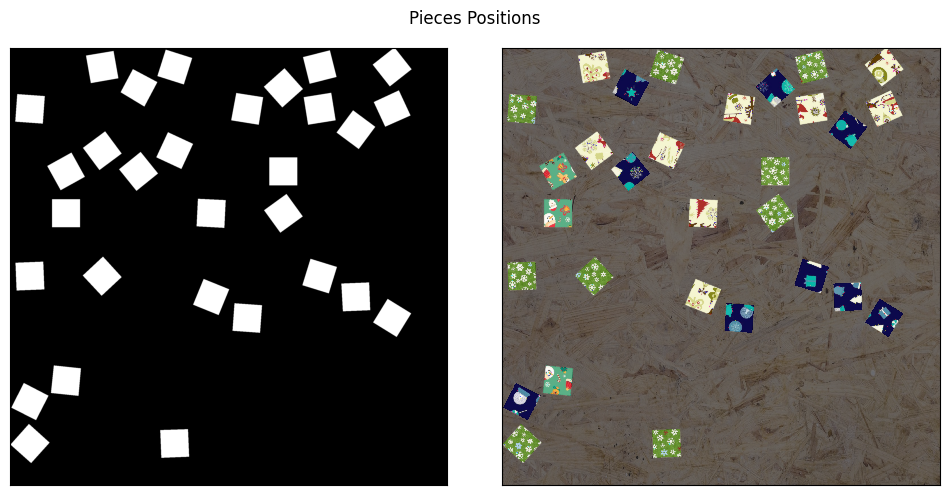

In [6]:
plt.imshow(seg.mask)
plt.axis("off")
plt.show()
seg.plot_mask()


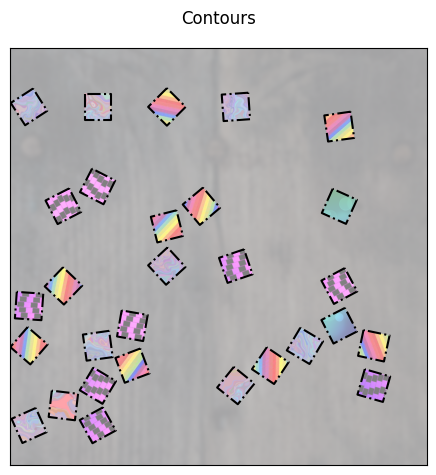

In [82]:
seg.plot_contours()

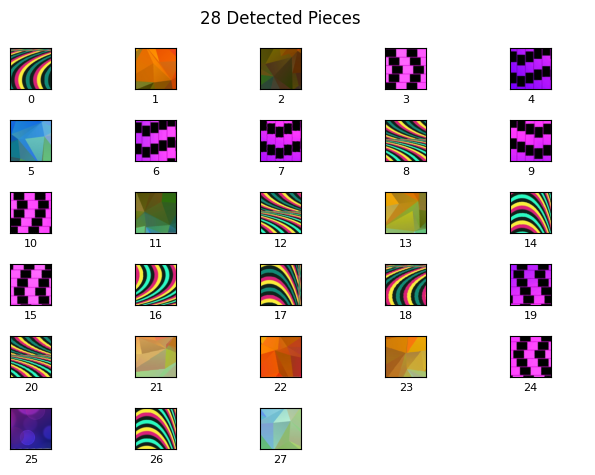

In [85]:
seg.plot_pieces()

In [101]:
import numpy as np
def a(features_PCA, labels):
    COLORS = ["r", "g", "b", "k"]
    fig = plt.figure(figsize=(5,5))
    for label in np.unique(labels):
        plt.scatter(
            *features_PCA[labels == label].T,
            c=COLORS[label],
            marker="x",
            label=f"{label} ({np.count_nonzero(labels==label)})",
        )
    fig.suptitle("PCA Features classified")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

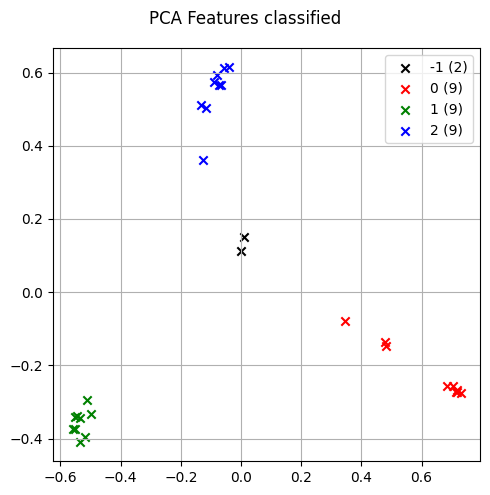

In [73]:
a(features_extractor.features_PCA, classifier.labels)

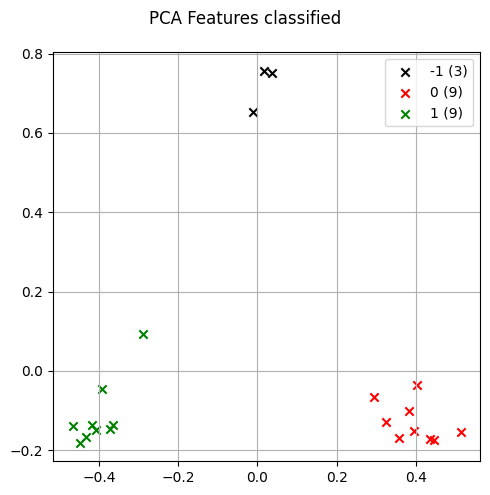

In [112]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, init_params="k-means++")
l = gm.fit_predict(features_extractor.features_PCA)

a(features_extractor.features_PCA, classifier.labels)

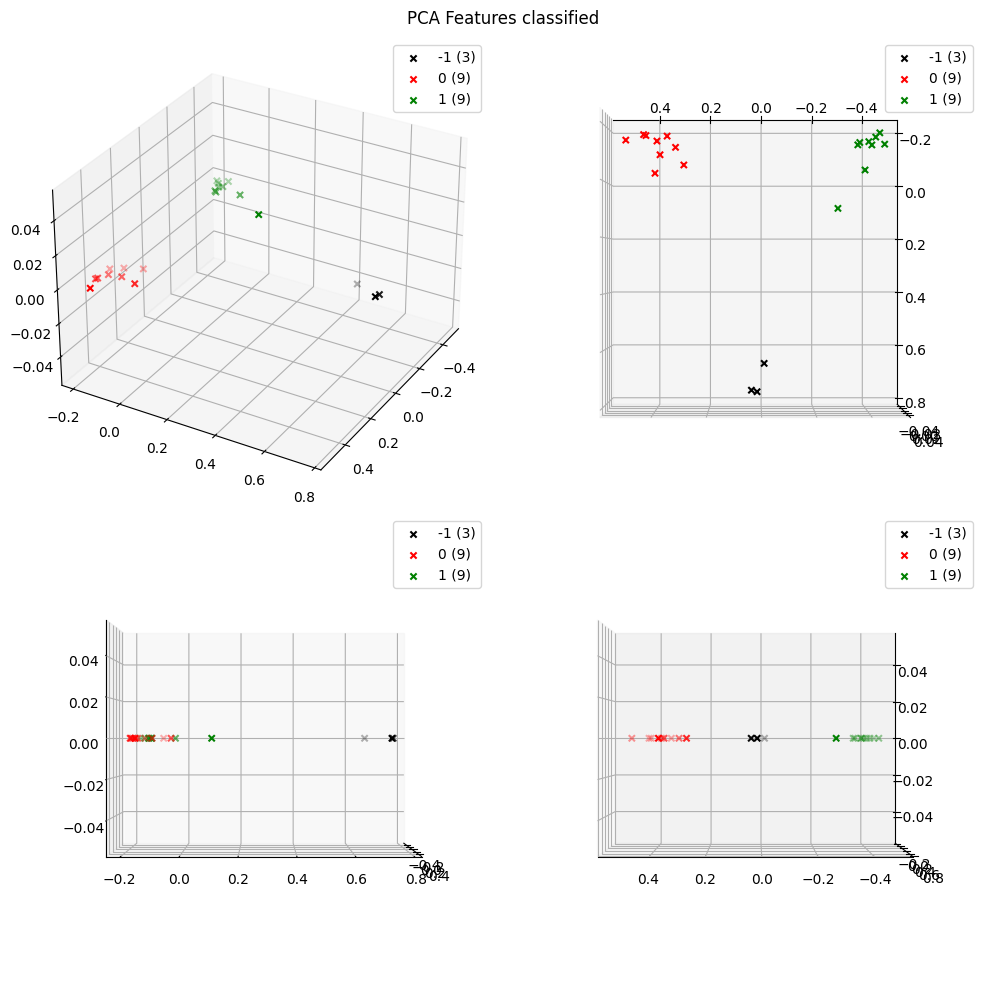

array([ 0,  0,  1, -1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,  0,  0,
        0, -1,  0, -1])

In [111]:
features_extractor = Features(seg.pieces)
features_extractor.find_features_PCA()

classifier = Classification(features_extractor.features_PCA)
classifier.classify(method=1)
classifier.classified_plot()
classifier.labels

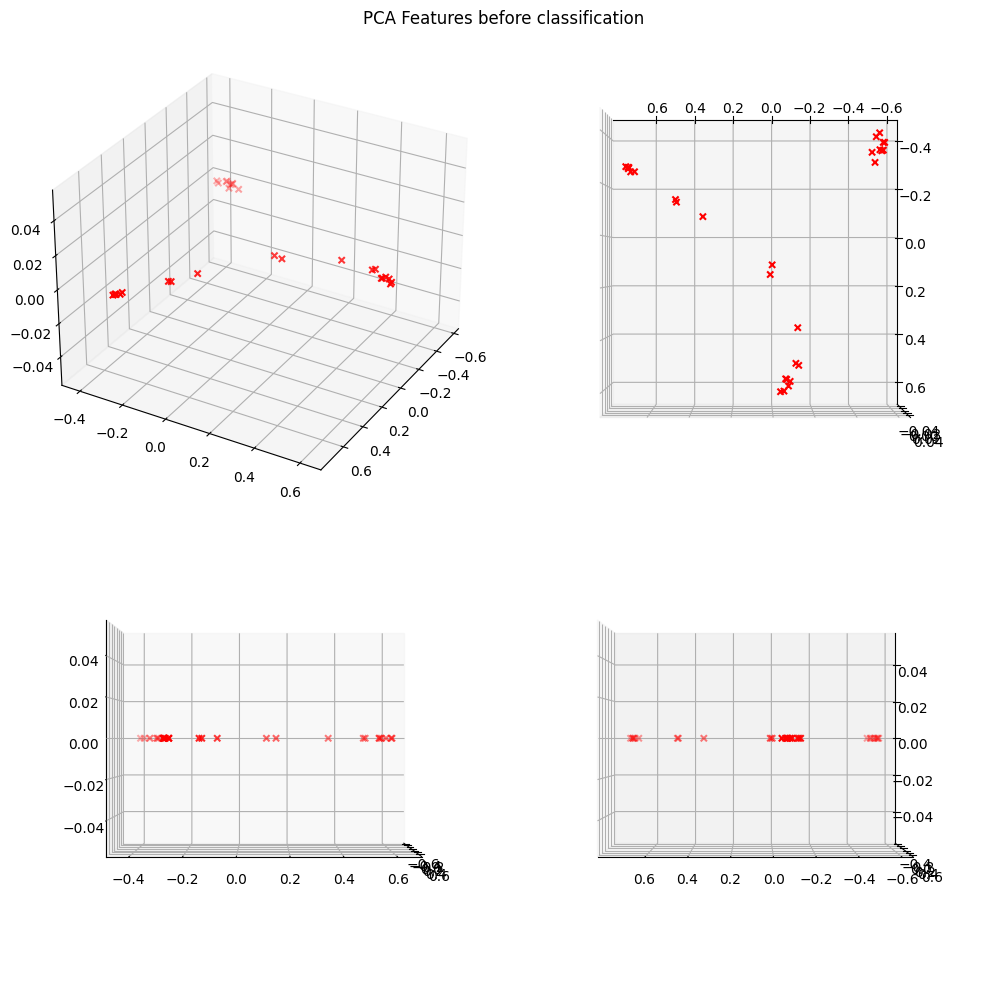

In [63]:
classifier.init_plot()

In [46]:
save(2,seg.mask,seg.pieces,features_extractor.features_PCA, classifier.labels)

saving solutions in folder:  data_project/solutions_group_13
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
